In [1]:
PATH_TRAINED_MODEL = './runs/plankton/checkpoints/net_trained_60'
LOG_DIR = './runs/plankton_768_protos_rfecv' #new model is also saved here

In [2]:
%matplotlib inline

In [3]:
import os
import pandas as pd
import numpy as np

df = pd.read_csv("testfile_2023-11-11-15:35:40_random_forest")

<AxesSubplot:>

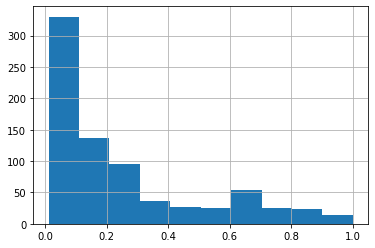

In [4]:
df.drop(columns='labels').mean(axis=0).hist()

In [5]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [6]:
estimator = RandomForestClassifier()

selector = RFECV(estimator, step=10, cv=3, scoring='f1_macro', verbose=1)

In [7]:
%%time
selector = selector.fit(df.drop(columns=['labels']).values, df['labels'].values)

Fitting estimator with 768 features.
Fitting estimator with 758 features.
Fitting estimator with 748 features.
Fitting estimator with 738 features.
Fitting estimator with 728 features.
Fitting estimator with 718 features.
Fitting estimator with 708 features.
Fitting estimator with 698 features.
Fitting estimator with 688 features.
Fitting estimator with 678 features.
Fitting estimator with 668 features.
Fitting estimator with 658 features.
Fitting estimator with 648 features.
Fitting estimator with 638 features.
Fitting estimator with 628 features.
Fitting estimator with 618 features.
Fitting estimator with 608 features.
Fitting estimator with 598 features.
Fitting estimator with 588 features.
Fitting estimator with 578 features.
Fitting estimator with 568 features.
Fitting estimator with 558 features.
Fitting estimator with 548 features.
Fitting estimator with 538 features.
Fitting estimator with 528 features.
Fitting estimator with 518 features.
Fitting estimator with 508 features.
F

Fitting estimator with 78 features.
Fitting estimator with 68 features.
Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.
Fitting estimator with 18 features.
Fitting estimator with 8 features.
Fitting estimator with 768 features.
Fitting estimator with 758 features.
Fitting estimator with 748 features.
Fitting estimator with 738 features.
Fitting estimator with 728 features.
Fitting estimator with 718 features.
Fitting estimator with 708 features.
Fitting estimator with 698 features.
Fitting estimator with 688 features.
Fitting estimator with 678 features.
Fitting estimator with 668 features.
Fitting estimator with 658 features.
Fitting estimator with 648 features.
Fitting estimator with 638 features.
Fitting estimator with 628 features.
Fitting estimator with 618 features.
Fitting estimator with 608 features.
Fitting estimator with 598 features.
Fitting estimator with 588 features.
Fitting es

In [8]:
mask = selector.support_
print('Number of dropped prototypes:', sum(~mask))
proto_kept, proto_dropped = np.where(mask)[0], np.where(~mask)[0]

Number of dropped prototypes: 580


In [9]:
to_sample = 20 # number of sampled prototypes for dropped and kept

In [10]:
from proto_drop_vis import visualize_topk_dropped

visualize_topk_dropped(proto_dropped, proto_kept, LOG_DIR, PATH_TRAINED_MODEL, 'dropped_kept_protos_768_rfecv', k=10, to_sample=to_sample)

CUDA device set without id specification
Device used:  cuda with id [0]
Number of prototypes:  768
chosen network is convnext
Pretrained network loaded
Num classes (k) =  86 ['Amphidinium_sp', 'Asterionellopsis', 'Cerataulina', 'Cerataulina_flagellate', 'Ceratium'] etc.
Visualizing prototypes for topk...


/sw/arch/RHEL8/EB_production/2022/software/PyTorch/1.12.0-foss-2022a-CUDA-11.7.0/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

0 prototypes do not have any similarity score > 0.1. Will be ignored in visualisation.



Visualizing topk: 100% 3096/3096 [01:48<00:00, 28.52it/s]

Abstained:  0
